# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# svm algorithm with mnist dataset

In [12]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

# Separate data and labels
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

# Split the dataset into training and test sets
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# Scale the data (SVMs work better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# Parameter grid for Polynomial Kernel (degree, C, coef0)
param_grid_poly = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'degree': [2, 3, 4],           # Degree of the polynomial
    'coef0': [0, 0.5, 1],          # Independent term in kernel function
    'kernel': ['poly']             # Polynomial kernel
}

# Parameter grid for RBF Kernel (C, gamma)
param_grid_rbf = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf']              # RBF kernel
}

# Parameter grid for Linear Kernel (C)
param_grid_linear = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'kernel': ['linear']           # Linear kernel
}

# Initialize the SVM model (we'll use this in GridSearchCV for all kernels)
svm_clf = SVC()

# Perform Grid Search for Polynomial Kernel
grid_search_poly = GridSearchCV(svm_clf, param_grid_poly, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_poly.fit(X_train_scaled, y_train)
best_poly_clf = grid_search_poly.best_estimator_

# Perform Grid Search for RBF Kernel
grid_search_rbf = GridSearchCV(svm_clf, param_grid_rbf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rbf.fit(X_train_scaled, y_train)
best_rbf_clf = grid_search_rbf.best_estimator_

# Perform Grid Search for Linear Kernel
grid_search_linear = GridSearchCV(svm_clf, param_grid_linear, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_linear.fit(X_train_scaled, y_train)
best_linear_clf = grid_search_linear.best_estimator_

# Compare the models on the test set
models = {
    'Polynomial SVM': best_poly_clf,
    'RBF SVM': best_rbf_clf,
    'Linear SVM': best_linear_clf
}

for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print the results
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")
    print(f"{name} F1-Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print best hyperparameters for each model
print("Best parameters for Polynomial SVM:", grid_search_poly.best_params_)
print("Best parameters for RBF SVM:", grid_search_rbf.best_params_)
print("Best parameters for Linear SVM:", grid_search_linear.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Evaluating Polynomial SVM...
Polynomial SVM Accuracy: 0.9802
Polynomial SVM Precision: 0.9802
Polynomial SVM Recall: 0.9802
Polynomial SVM F1-Score: 0.9802

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.9

C:\Users\saira\AppData\Local\Temp\ipykernel_22496\2989280633.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(classifiers, rotation=45, ha='right')
C:\Users\saira\AppData\Local\Temp\ipykernel_22496\2989280633.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(classifiers, rotation=45, ha='right')
C:\Users\saira\AppData\Local\Temp\ipykernel_22496\2989280633.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(classifiers, rotation=45, ha='right')
C:\Users\saira\AppData\Local\Temp\ipykernel_22496\2989280633.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xt

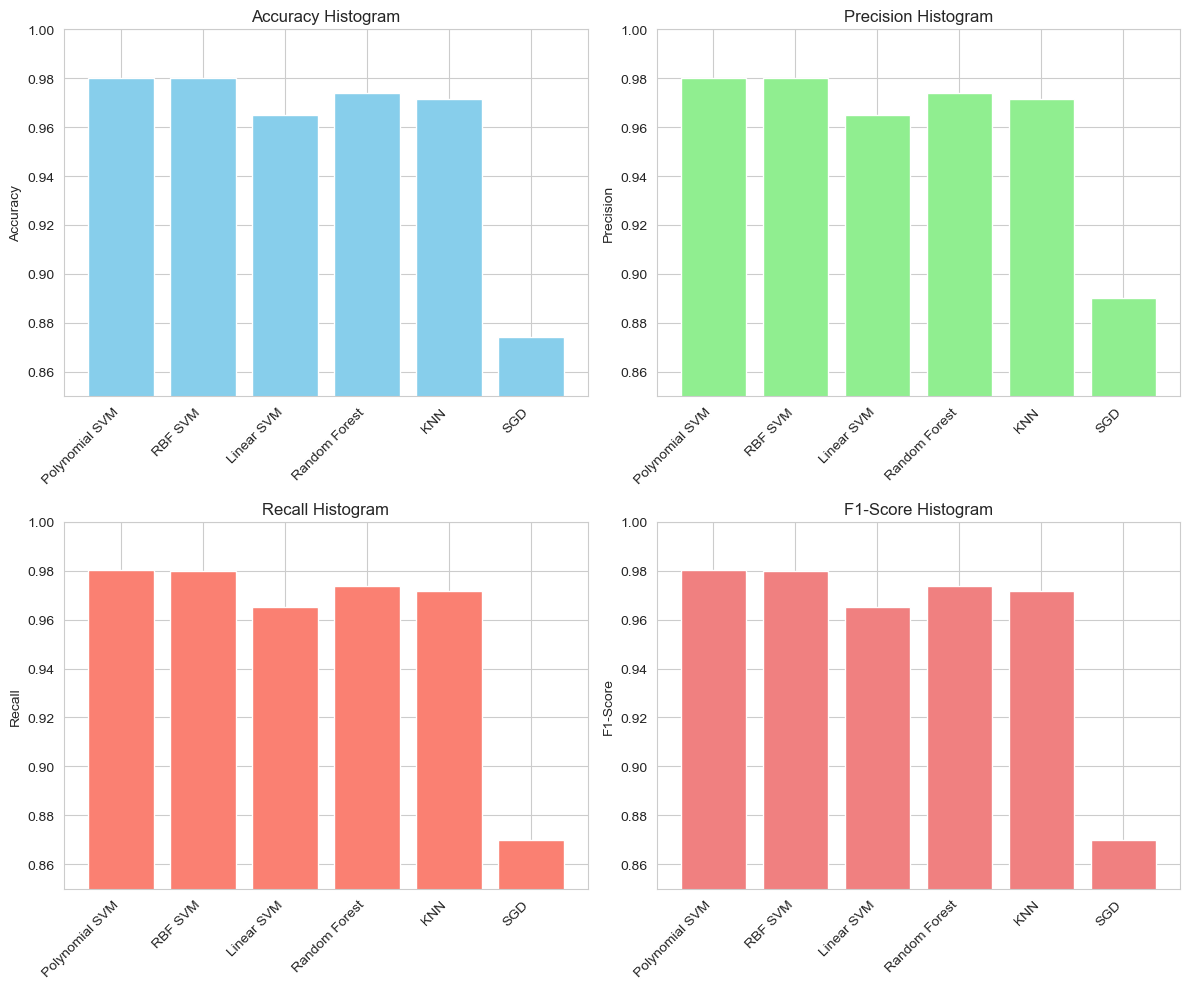

In [8]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['Polynomial SVM', 'RBF SVM', 'Linear SVM', 'Random Forest', 'KNN', 'SGD']

# Accuracy, Precision, Recall, F1-Score
accuracy = [0.9802, 0.98, 0.965, 0.9739, 0.9717, 0.8740]
precision = [0.9802, 0.98, 0.965, 0.9739, 0.9717, 0.8900]
recall = [0.9802, 0.98, 0.965, 0.9739, 0.9717, 0.8700]
f1_score = [0.9802, 0.98, 0.965, 0.9739, 0.9717, 0.8700]

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the histograms
axs[0, 0].bar(classifiers, accuracy, color='skyblue')
axs[0, 0].set_title('Accuracy Histogram')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim([0.85, 1.0])
axs[0, 0].set_xticklabels(classifiers, rotation=45, ha='right')

axs[0, 1].bar(classifiers, precision, color='lightgreen')
axs[0, 1].set_title('Precision Histogram')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_ylim([0.85, 1.0])
axs[0, 1].set_xticklabels(classifiers, rotation=45, ha='right')

axs[1, 0].bar(classifiers, recall, color='salmon')
axs[1, 0].set_title('Recall Histogram')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_ylim([0.85, 1.0])
axs[1, 0].set_xticklabels(classifiers, rotation=45, ha='right')

axs[1, 1].bar(classifiers, f1_score, color='lightcoral')
axs[1, 1].set_title('F1-Score Histogram')
axs[1, 1].set_ylabel('F1-Score')
axs[1, 1].set_ylim([0.85, 1.0])
axs[1, 1].set_xticklabels(classifiers, rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the histograms
plt.show()
